## dropna and fillna
- df.**dropna(subset=['column whose nulls are to be removed'])** removes nulls in the specified column
- df['column with nulls to be filled'].**fillna(enter what to replace null with)**

- **plt.xticks(rotation = 45, ha = 'right')** rotation aligns the labels to any angle, ha justifies labels to right, center, or left
- df.**drop_duplicates(subset= ['column/ columns with duplicates to be removed'])**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('C:/Users/Ian/Desktop/panda ex/newdata_jobs2.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

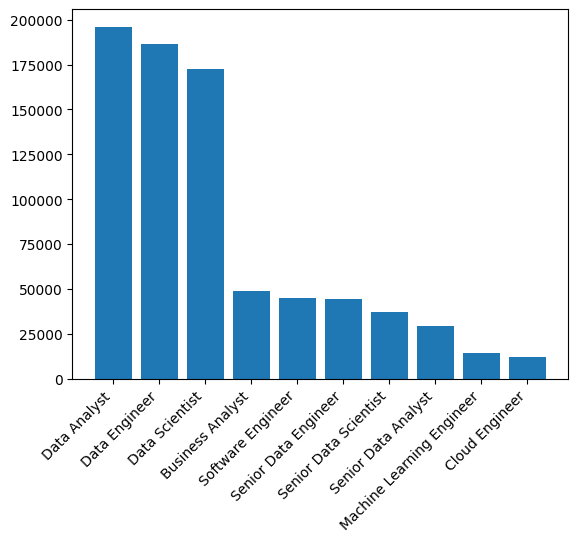

In [3]:
job_count = df.groupby(['job_title_short'])['job_title_short'].count()
job_count = job_count.sort_values(ascending = False )
plt.bar(job_count.index, job_count)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

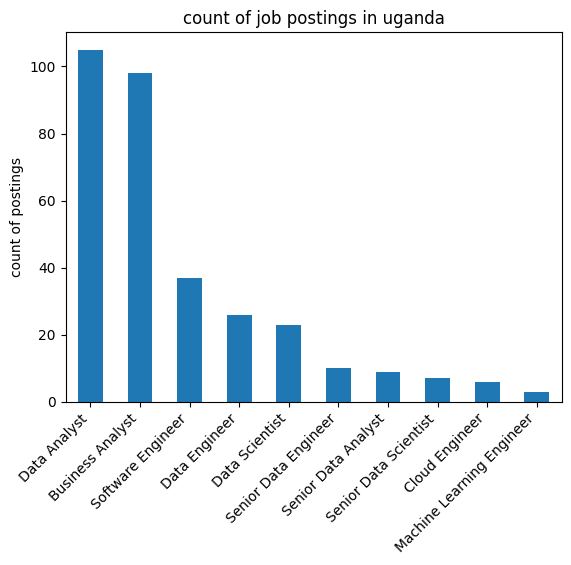

In [4]:
ug_jobs = df[df.job_country == 'Uganda']
ug_jobs1 = ug_jobs.groupby(['job_title_short'])['job_title_short'].count()
ug_jobs1 = ug_jobs1.sort_values(ascending= False)
ug_jobs1.plot(kind= 'bar')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('count of postings')
plt.xlabel('')
plt.title('count of job postings in uganda')
plt.show()

In [15]:
df.loc[:, 'salary_rate':'salary_hour_avg'].dropna(subset=['salary_rate'])

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,45.98
43,hour,115000.0,97.50
51,hour,115000.0,72.50
77,year,140000.0,45.98
92,year,120000.0,45.98
100,year,228222.0,45.98


In [6]:
# data cleaning
# fill na with median values

median_salary_hour = df.salary_hour_avg.median()


In [7]:
median_salary_year = df.salary_year_avg.median()

In [8]:

df_filled = df

In [9]:
# fillna method fills the specified column of null cells with any character provided.
# fillna is like replace but only replacing blank cells in a column with a selected charater
df_filled['salary_hour_avg'] = df_filled.salary_hour_avg.fillna(median_salary_hour)

In [10]:
df_filled['salary_year_avg'] = df_filled.salary_year_avg.fillna(median_salary_year)

In [11]:
# REMOVING duplicates
df_unique = df_filled

In [12]:
df_unique = df_unique.drop_duplicates()
df_unique = df_unique.drop_duplicates(subset= ['job_title', 'company_name'])
print(f'original: {len(df)}, dropped: {len(df_filled) -len(df_unique)}')

original: 785741, dropped: 277699
